#### OBJECTIVES: Using the Chicago Crime Dataset, perfoRm the following data preparation steps:

1. Use a funtion to Drop redundant columns (a redundant colum is one that gives infromation that another column already explains: eg ID and Case number) 
2. Use functions to create new columns for Months, Day, Season.
3. Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?
4.  According to location description, where does crime hapen the most?
5.  Did the Types of crime change as years go by? if yes/no. let the data show the insight.

In [2]:
# Import pandas package 
import pandas as pd
 
# Read the data into the environment
dataset = pd.read_csv("chicago2.csv")

# Inspect the first 10 rows
dataset.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,53000,4809324,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,...,21.0,71.0,18,1174545.0,1845186.0,2006,02/10/2018 03:50:01 PM,41.730582,-87.636172,"(41.730582057, -87.636172403)"
1,53001,2599849,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,...,38.0,16.0,06,1147850.0,1926182.0,2003,02/28/2018 03:56:25 PM,41.953398,-87.731888,"(41.953397577, -87.73188822)"
2,53002,7495181,HR183541,02/22/2009 07:42:00 PM,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,...,28.0,29.0,08B,NaN,NaN,2009,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,53003,2628412,HJ231141,03/07/2003 02:46:00 PM,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,...,47.0,5.0,06,1158854.0,1923830.0,2003,02/28/2018 03:56:25 PM,41.946725,-87.691501,"(41.946724511, -87.691501175)"
4,53004,8389615,HT622350,12/06/2011 12:00:00 AM,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,...,17.0,68.0,26,1169905.0,1856761.0,2011,02/04/2016 06:33:39 AM,41.762447,-87.652835,"(41.762447305, -87.652834901)"
5,53005,10867238,JA173726,03/02/2017 12:00:00 PM,097XX S NORMAL AVE,1120,DECEPTIVE PRACTICE,FORGERY,RESIDENCE,False,...,21.0,73.0,10,1174678.0,1840350.0,2017,02/10/2018 03:50:01 PM,41.717308,-87.635829,"(41.717308454, -87.635828725)"
6,53006,11199346,JB109858,01/08/2018 09:30:00 PM,012XX E 46TH ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,...,4.0,39.0,06,1185333.0,1874509.0,2018,05/04/2018 03:51:04 PM,41.810800,-87.595732,"(41.810800457, -87.595731527)"
7,53007,8682902,HV342880,06/19/2012 04:50:00 PM,019XX E 73RD PL,031B,ROBBERY,ARMED: OTHER FIREARM,ALLEY,False,...,5.0,43.0,03,1190586.0,1856623.0,2012,02/04/2016 06:33:39 AM,41.761595,-87.577041,"(41.761594665, -87.577041413)"
8,53008,8060983,HT292186,05/09/2011 01:58:00 PM,051XX N DAMEN AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",False,...,47.0,4.0,08B,1162074.0,1934195.0,2011,02/04/2016 06:33:39 AM,41.975100,-87.679375,"(41.975099794, -87.679374655)"
9,53009,9694865,HX345290,07/14/2014 08:08:00 PM,054XX W BELMONT AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,DEPARTMENT STORE,True,...,30.0,19.0,08B,1139722.0,1920746.0,2014,02/10/2018 03:50:01 PM,41.938633,-87.761901,"(41.938633302, -87.761901059)"


In [3]:
# Check the columns of the data
dataset.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [4]:
# Check for the brief overview of the dat
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1000 non-null   int64  
 1   ID                    1000 non-null   int64  
 2   Case Number           1000 non-null   object 
 3   Date                  1000 non-null   object 
 4   Block                 1000 non-null   object 
 5   IUCR                  1000 non-null   object 
 6   Primary Type          1000 non-null   object 
 7   Description           1000 non-null   object 
 8   Location Description  999 non-null    object 
 9   Arrest                1000 non-null   bool   
 10  Domestic              1000 non-null   bool   
 11  Beat                  1000 non-null   int64  
 12  District              1000 non-null   float64
 13  Ward                  929 non-null    float64
 14  Community Area        929 non-null    float64
 15  FBI Code              

In [5]:
# Check the dimensions of the data
dataset.shape

(1000, 23)

### 1. Use a funtion to Drop redundant columns (a redundant colum is one that gives infromation that another column already explains: eg ID and Case number) 

Dropping redundant columns
1. Unnamed is similar to the index of the dataframe- dropping Unnamed
2. ID and Case Number are similar- dropping ID
3. X coordinate and Y coordinate AND Latitude and Longitude redundantly describe geographical location- Dropping location AND X and Y coordinates
4. Community area and ward are similar to geographical subdivisions or clusters within the city, they might overlap at some point- Dropping community area

In [6]:
dataset.drop(["Unnamed: 0", "ID", "Location", "Community Area", "X Coordinate", "Y Coordinate"], axis=1, inplace=True)

In [7]:
dataset.head()

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Updated On,Latitude,Longitude
0,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,2223,22.0,21.0,18,2006,02/10/2018 03:50:01 PM,41.730582,-87.636172
1,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1731,17.0,38.0,06,2003,02/28/2018 03:56:25 PM,41.953398,-87.731888
2,HR183541,02/22/2009 07:42:00 PM,011XX S CALIFORNIA AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,OTHER,False,False,1135,11.0,28.0,08B,2009,08/17/2015 03:03:40 PM,NaN,NaN
3,HJ231141,03/07/2003 02:46:00 PM,025XX W ADDISON ST,0890,THEFT,FROM BUILDING,"SCHOOL, PUBLIC, BUILDING",False,False,1913,19.0,47.0,06,2003,02/28/2018 03:56:25 PM,41.946725,-87.691501
4,HT622350,12/06/2011 12:00:00 AM,072XX S MAY ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,APARTMENT,False,True,733,7.0,17.0,26,2011,02/04/2016 06:33:39 AM,41.762447,-87.652835


Before we proceed to answer other questions or do feature engineering to create columns we need, let us handle missing values first.

From our data, Location description, Ward, Latitude, and Longitude are all missing one or more data which we would handle

In [8]:
dataset.isna().sum()

Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     1
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                    71
FBI Code                 0
Year                     0
Updated On               0
Latitude                13
Longitude               13
dtype: int64

Handling Location Description missing data

Location Description refers to the type of location where the crime occurred such as on the street, pool room, residence etc, I will be using the most common place to fill up the missing data

In [9]:
# Examine the missing data
dataset[dataset["Location Description"].isna()]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Updated On,Latitude,Longitude
872,JB222167,02/12/2016 09:40:00 AM,016XX N SAYRE AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,2513,25.0,36.0,11,2016,04/14/2018 03:51:10 PM,NaN,NaN


In [10]:
# Get mode and subset first value in the series
most_frequent_LD = dataset["Location Description"].mode()[0]

# Assign the mode to the missing value
dataset["Location Description"] = dataset["Location Description"].fillna(most_frequent_LD)

In [11]:
dataset.isna().sum()

Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     0
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                    71
FBI Code                 0
Year                     0
Updated On               0
Latitude                13
Longitude               13
dtype: int64

Handling Ward missing data

From viewing the rows with missing data in the ward column, it would make sense to also use the modal value to fill up missing values. I had doubts about using mode initially because I thought they might be clustered to a particular location and this might really affect the data in that location. They are dispersed as evidenced by the districts where the missing data are located so its okay to use mode.

In [12]:
# View the rows with missing ward data
dataset[dataset["Ward"].isna()]

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Updated On,Latitude,Longitude
10,G037507,01/12/2001 01:00:00 AM,022XX N CAMPBELL AV,1310,CRIMINAL DAMAGE,TO PROPERTY,STREET,False,False,1431,14.0,NaN,14,2001,08/17/2015 03:03:40 PM,41.922630,-87.689476
29,G696159,11/19/2001 01:00:00 PM,058XX W WASHINGTON BL,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,1513,15.0,NaN,14,2001,08/17/2015 03:03:40 PM,41.882057,-87.770561
40,G196985,04/07/2001 12:00:00 AM,019XX S WOLCOTT AV,0810,THEFT,OVER $500,STREET,False,False,1223,12.0,NaN,06,2001,08/17/2015 03:03:40 PM,41.855506,-87.673635
58,G480065,08/13/2001 07:57:15 AM,058XX S INDIANA AV,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,233,2.0,NaN,05,2001,08/17/2015 03:03:40 PM,41.787759,-87.620816
69,HH235727,03/11/2002 02:45:00 PM,060XX S WASHTENAW AV,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,825,8.0,NaN,26,2002,02/28/2018 03:56:25 PM,41.783944,-87.691085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,G035988,01/16/2001 02:50:00 PM,007XX S CALIFORNIA AV,0460,BATTERY,SIMPLE,RESIDENCE,False,True,1135,11.0,NaN,08B,2001,08/17/2015 03:03:40 PM,41.871608,-87.696189
958,HH257867,03/21/2002 06:00:00 PM,023XX N NEVA AV,2820,OTHER OFFENSE,TELEPHONE THREAT,APARTMENT,False,False,2512,25.0,NaN,26,2002,02/10/2018 03:50:01 PM,41.921650,-87.804342
970,G665688,11/01/2001 11:00:00 PM,001XX N WACKER DR,0560,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,111,1.0,NaN,08A,2001,08/17/2015 03:03:40 PM,41.883784,-87.636665
994,G516008,08/14/2001 08:50:00 PM,041XX W 78 ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,834,8.0,NaN,26,2001,08/17/2015 03:03:40 PM,41.751396,-87.724700


In [13]:
# Get mode and subset first value in the series
mode_ward = dataset["Ward"].mode()[0]

# Assign modal value to ward
dataset["Ward"] = dataset["Ward"].fillna(mode_ward)

In [14]:
dataset.isna().sum()

Case Number              0
Date                     0
Block                    0
IUCR                     0
Primary Type             0
Description              0
Location Description     0
Arrest                   0
Domestic                 0
Beat                     0
District                 0
Ward                     0
FBI Code                 0
Year                     0
Updated On               0
Latitude                13
Longitude               13
dtype: int64

Handling Latitude and Longitude missing data

Taking a good look at our data info above, the district data does not have any missing data and that is a very good thing because we can group our district data, generate measures of central tendency such as median, mean, or mode per district and use that to fill up our missing latitude and longitude data.

The short summary is that latitude and longitude points to specific locations and districts would have latitude and longitude data that are very close because they are located in the same place.

In [15]:
# Let's see the unique values in our district data
dataset["District"].unique()

array([22., 17., 11., 19.,  7.,  2.,  3., 20., 25., 14.,  1., 18., 12.,
        6., 10.,  4., 24., 15.,  5., 16.,  8.,  9.])

In [16]:
# Define a function that fills the longitude and latitude data with median values
def fill_long_lat(x):
    x = x.fillna(x.median())
    return x

In [17]:
dataset["Longitude"] = dataset.groupby("District", group_keys=False)["Longitude"].apply(fill_long_lat)
dataset["Latitude"] = dataset.groupby("District", group_keys=False)["Latitude"].apply(fill_long_lat)

In [18]:
dataset.isna().sum()

# Finally, we have handled all missing data

Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
FBI Code                0
Year                    0
Updated On              0
Latitude                0
Longitude               0
dtype: int64

### 2. Use functions to create new columns for Months, Day, Season.

Our dataset has a data column that contains day, month, year, hours, minutes, seconds, and PM or AM. We will be using this column to get our Months, Day, and Season data

In [19]:
from datetime import datetime

def extract_months(date):
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')
    months = date_column.dt.month_name()
    return months

def extract_day_of_week(date):
    date_column = pd.to_datetime(date, format='%m/%d/%Y %I:%M:%S %p')
    day_of_week = date_column.dt.day_name()
    return day_of_week

In [20]:
dataset["Month"] = extract_months(dataset["Date"])
dataset["Day"] = extract_day_of_week(dataset["Date"])

In [21]:
def assign_season(month):
    if month in ["January", "February", "December"]:
        return "Winter"
    elif month in ["March", "April", "May"]:
        return "Spring"
    elif month in ["June", "July", "August"]:
        return "Summer"
    else:
        return "Fall"

# Assuming dataset is a DataFrame with a column "Month"
dataset["Season"] = dataset["Month"].apply(assign_season)

In [22]:
dataset.head(2)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,FBI Code,Year,Updated On,Latitude,Longitude,Month,Day,Season
0,HM300447,04/19/2006 04:45:02 PM,090XX S NORMAL AVE,1812,NARCOTICS,POSS: CANNABIS MORE THAN 30GMS,RESIDENCE,False,False,2223,22.0,21.0,18,2006,02/10/2018 03:50:01 PM,41.730582,-87.636172,April,Wednesday,Spring
1,HJ197748,02/21/2003 06:30:00 PM,039XX N AVONDALE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,1731,17.0,38.0,06,2003,02/28/2018 03:56:25 PM,41.953398,-87.731888,February,Friday,Winter


### 3. Use subsetting and grouping to show how the frequency of crime is distributed within Months, Days, Seasons with the most crime record and what crimes are highest and lowest?

We could approach this in two ways:

1. Group by the primary type which talks about type of crime and subset the months, days, and seasons which would give us three separate series

2. Group by the primary type and subset months, days, and seasons which would return a single series

In [23]:
# Approach 1
crime_freq_month = dataset.groupby("Primary Type")[["Month"]].value_counts()
crime_freq_day = dataset.groupby("Primary Type")[["Day"]].value_counts()
crime_freq_season = dataset.groupby("Primary Type")[["Season"]].value_counts()

In [24]:
# frequency of crime distribution by month
crime_freq_month.sort_values(ascending=False)

Primary Type            Month    
THEFT                   September    25
BATTERY                 July         23
THEFT                   October      22
BATTERY                 May          22
                        October      20
                                     ..
PROSTITUTION            July          1
                        September     1
PUBLIC PEACE VIOLATION  July          1
                        April         1
WEAPONS VIOLATION       September     1
Length: 173, dtype: int64

In [25]:
# frequency of crime distribution by day
crime_freq_day.sort_values(ascending=False)

Primary Type                Day     
THEFT                       Monday      42
                            Friday      33
BATTERY                     Thursday    33
THEFT                       Tuesday     31
BATTERY                     Monday      29
                                        ..
OFFENSE INVOLVING CHILDREN  Thursday     1
GAMBLING                    Saturday     1
CRIM SEXUAL ASSAULT         Friday       1
PROSTITUTION                Thursday     1
WEAPONS VIOLATION           Monday       1
Length: 111, dtype: int64

In [26]:
# frequency of crime distribution by season
crime_freq_season.sort_values(ascending=False)

Primary Type                      Season
THEFT                             Fall      65
                                  Spring    53
BATTERY                           Spring    52
                                  Fall      48
                                  Summer    47
                                            ..
PROSTITUTION                      Spring     1
INTERFERENCE WITH PUBLIC OFFICER  Summer     1
                                  Winter     1
INTIMIDATION                      Fall       1
LIQUOR LAW VIOLATION              Fall       1
Length: 73, dtype: int64

In [27]:
# Approach 2
# frequency of crime distribution by Month, Day, and Season
crime_freq_month_day_season = dataset.groupby("Primary Type")[["Month", "Day", "Season"]].value_counts()

In [28]:
crime_freq_month_day_season.sort_values(ascending=False)

Primary Type        Month      Day        Season
BATTERY             July       Thursday   Summer    9
                    May        Monday     Spring    8
                    October    Sunday     Fall      6
                    January    Saturday   Winter    6
THEFT               September  Tuesday    Fall      6
                                                   ..
DECEPTIVE PRACTICE  September  Thursday   Fall      1
CRIMINAL TRESPASS   September  Wednesday  Fall      1
                               Saturday   Fall      1
                    April      Sunday     Spring    1
WEAPONS VIOLATION   September  Tuesday    Fall      1
Length: 597, dtype: int64

### 4.  According to location description, where does crime happen the most?

In [29]:
crime_rate_by_location = dataset["Location Description"].value_counts()

In [30]:
crime_rate_by_location.sort_values(ascending=False)

STREET                               256
RESIDENCE                            169
APARTMENT                            123
SIDEWALK                              87
OTHER                                 35
                                    ... 
OTHER RAILROAD PROP / TRAIN DEPOT      1
HOSPITAL BUILDING / GROUNDS            1
RESIDENCE - PORCH / HALLWAY            1
SCHOOL, PRIVATE, BUILDING              1
DAY CARE CENTER                        1
Name: Location Description, Length: 61, dtype: int64

### 5.Did the Types of crime change as years go by? if yes/no. let the data show the insight.

In [31]:
crime_yearly_trend = dataset.groupby("Year")["Primary Type"].value_counts()

In [32]:
crime_yearly_trend

Year  Primary Type       
2001  BATTERY                16
      THEFT                  14
      BURGLARY                4
      CRIMINAL DAMAGE         3
      MOTOR VEHICLE THEFT     3
                             ..
2022  THEFT                   2
      WEAPONS VIOLATION       2
      KIDNAPPING              1
      MOTOR VEHICLE THEFT     1
      OTHER OFFENSE           1
Name: Primary Type, Length: 260, dtype: int64

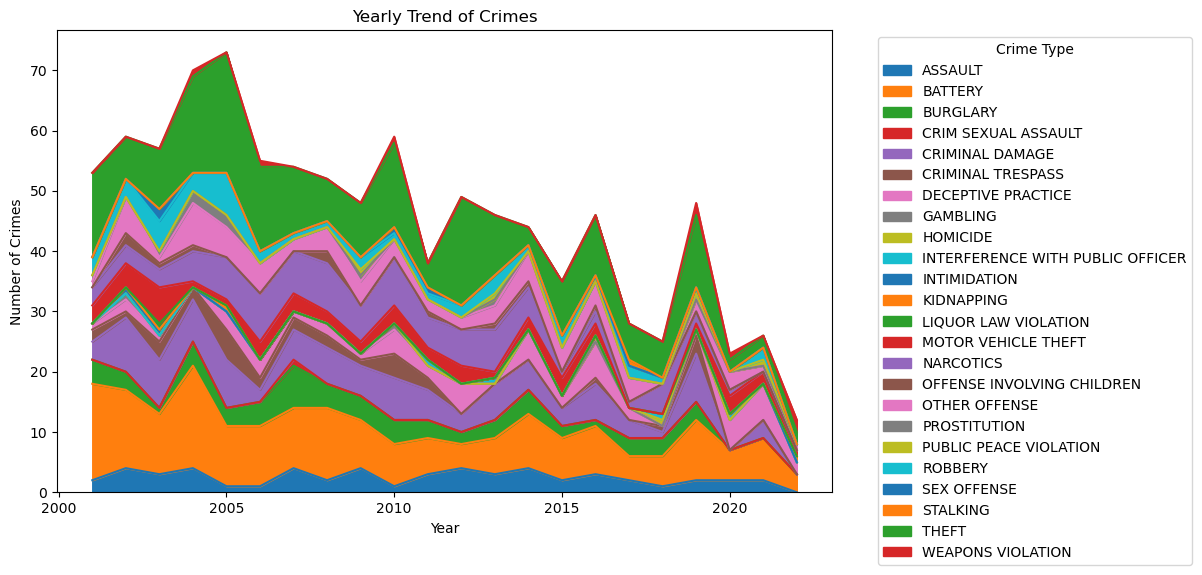

In [33]:
import matplotlib.pyplot as plt

# Unstack the data generated by the groupby to transform the hierarchical index gotten into a convenient tabular day for plotting
crime_yearly_trend = dataset.groupby("Year")["Primary Type"].value_counts().unstack()

# Using the stacked area plot to visualize the data
crime_yearly_trend.plot(kind='area', stacked=True, figsize=(10, 6))

# Set plot title
plt.title('Yearly Trend of Crimes')

# Set axis titles
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# Set the legend since to differentiate the categories visaully
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In assessing whether there have been shifts in the landscape of criminal activity over time, the analysis reveals that while the specific types of crimes have persisted, their occurrence has shown a notable decrease over the years. Focusing on theft, which emerges as the predominant offense, a discernible pattern emerges. Initially, theft rates exhibited a sharp incline, peaking in approximately 2005 at a frequency of approximately 70 instances, with slight fluctuations around this apex. However, subsequent years witnessed a gradual but consistent decline, with occurrences diminishing to approximately 10 past the year 2020.

Similar trends are observed across other categories of crime, with notable spikes occurring around the year 2005, followed by a parallel trajectory of decline. Ultimately, while the frequency of criminal incidents has evolved over time, the fundamental composition of criminal activities has remained largely consistent.